## Representation of Data in Scikit-learn

Machine learning is about creating models from data: for that reason, we'll start by
discussing how data can be represented in order to be understood by the computer.  

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

<img src="img/data-layout.png" />

<hr>
<hr>

## A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the
iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.
There are three species of iris in the dataset, which we can picture here:

<center>
    <img src="img/petal_sepal.jpg" width="30%" />
</center>

For the purposes of this exercise, let's pretend we're working for a startup that just got funded to create a smartphone app that automatically identifies species of flowers from pictures taken on the smartphone. We're working with a moderately-sized team of data scientists and will be building part of the data analysis pipeline for this app.

We've been tasked by our company's Head of Data Science to create a demo machine learning model that takes four measurements from the flowers (sepal length, sepal width, petal length, and petal width) and identifies the species based on those measurements alone.

<b>Data set</b> :We've been given a data set from our field researchers to develop the demo, which only includes measurements for three types of Iris flowers:

<table>
    <thead>
        <tr>
        <td>
            Iris setosa
        </td>
        <td>
             Iris versicolor
        </td>
        <td>
             Iris virginica
        </td>
    </tr>
    </thead>    
    <tbody>
        <tr>        
        <td>
             <img src="img/iris_setosa.jpg" width="60%"/>
        </td>
        <td>
             <img src="img/iris_versicolor.jpg"  width="60%" />
        </td>
        <td>
             <img src="img/iris_virginica.jpg"  width="60%"/>
        </td>
    </tr>
    </tbody>
</table>

The four measurements we're using currently come from hand-measurements by the field researchers, but they will be automatically measured by an image processing model in the future.

<hr>
<hr>

### Quick Question:

**If we want to design an algorithm to recognize iris species, what might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [6]:
#import sys
#sys.path

In [1]:
import sklearn

In [2]:
sklearn.datasets.load_iris

AttributeError: module 'sklearn' has no attribute 'datasets'

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [10]:
X = iris.data

In [12]:
X.shape

(150, 4)

In [14]:
Y = iris.target

In [16]:
Y.shape

(150,)

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
set(iris.target)

{0, 1, 2}

In [21]:
for item in iris.target:
    print(iris.target_names[item])

setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica


In [8]:
iris.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [8]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

(150, 4)
[5.1 3.5 1.4 0.2]


In [9]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [10]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot:

In [34]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [39]:
print(X)

1


In [37]:
X=1

In [49]:
x_index = 0
y_index = 1

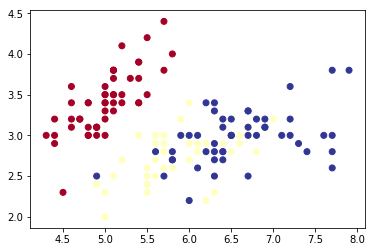

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

X = iris.data

#for i in range(0,6):
#    plt.subplot(1,6,i+1)
#    plt.scatter(X[:,i],Y,c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.scatter(X[:,0],X[:,1],c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))


# plt.colorbar(ticks=[0, 1, 2], format=formatter)
# plt.clim(-0.5, 2.5)
# plt.xlabel(iris.feature_names[x_index])
# plt.ylabel(iris.feature_names[y_index]);

In [23]:
plt.show()